In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

import warnings
warnings.filterwarnings('ignore')

Dataset Source : https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [2]:
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
## Check Imbalance Data

In [4]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [5]:
pd.crosstab(index=df['Class'], columns='count', normalize = True)*100

col_0,count
Class,
0,99.827251
1,0.172749


## Membuat Model Deteksi Fraud
- 1 => Fraud
- 0 => Non-Fraud

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

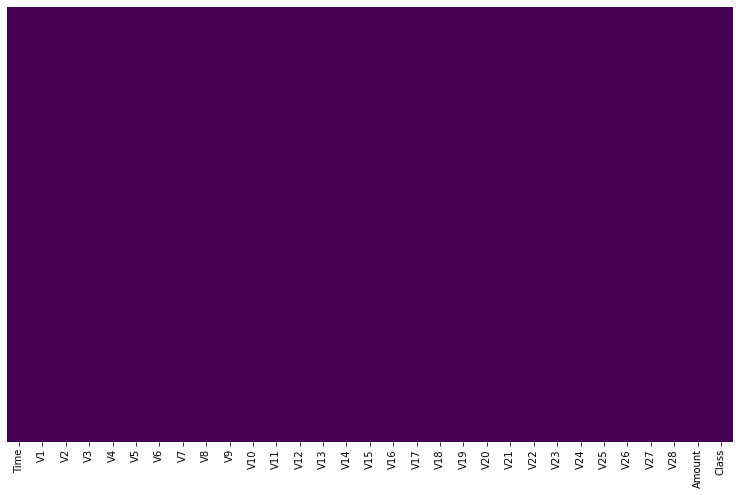

In [7]:
plt.figure(figsize=(13,8))
sns.heatmap(df.isna(),cmap = 'viridis', cbar = False, yticklabels=False)
plt.show()

In [8]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
## Splitting Data

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop(columns='Class')
y = df['Class']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y,test_size = .20, random_state = 42)

In [13]:
X_train.shape

(227845, 30)

In [14]:
X_test.shape

(56962, 30)

In [15]:
## ML Modelling

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
LR = LogisticRegression()

In [18]:
LR.fit(X_train, y_train)

LogisticRegression()

## Model - Fraud Detection
- Class 0 = Non Fraud
- Class 1 = Fraud

### Model akan berfokus di Recall Class 1
- yg akan dihindari - diminimalisir adalah Error - False Negative => **Aktual Fraud** tetapi diprediksi **Non-Fraud**

In [19]:
## Evaluation Matrix

In [20]:
from sklearn.metrics import accuracy_score, recall_score, recall_score, precision_score, roc_auc_score, f1_score, classification_report, confusion_matrix

In [21]:
y_predLR = LR.predict(X_test)

In [22]:
y_trainLR = LR.predict(X_train)

In [23]:
## Train

In [24]:
print(classification_report(y_train, y_trainLR))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.73      0.68      0.70       394

    accuracy                           1.00    227845
   macro avg       0.86      0.84      0.85    227845
weighted avg       1.00      1.00      1.00    227845



In [25]:
## Test

In [26]:
print(classification_report(y_test, y_predLR))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.72      0.73        98

    accuracy                           1.00     56962
   macro avg       0.87      0.86      0.86     56962
weighted avg       1.00      1.00      1.00     56962



In [27]:
accuracy_score(y_test, y_predLR)

0.9990695551420246

In [28]:
cm_LR_ts = confusion_matrix(y_test, y_predLR, labels = [1, 0])

In [29]:
df_LR_ts = pd.DataFrame(cm_LR_ts, index = ['Akt 1', 'Akt 0'], columns = ['Pred 1', 'Pred 0'])
df_LR_ts

,Pred 1,Pred 0
Akt 1,71,27
Akt 0,26,56838


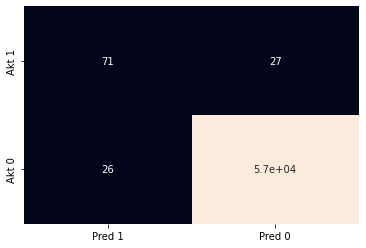

In [30]:
sns.heatmap(df_LR_ts, annot=True, cbar=False)
plt.show()

In [31]:
cm_LR_tr = confusion_matrix(y_train, y_trainLR, labels = [1, 0])

In [32]:
df_LR_tr = pd.DataFrame(cm_LR_tr, index = ['Akt 1', 'Akt 0'], columns = ['Pred 1', 'Pred 0'])
df_LR_tr

,Pred 1,Pred 0
Akt 1,268,126
Akt 0,100,227351


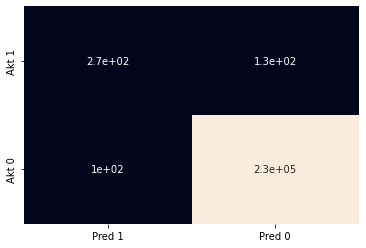

In [33]:
sns.heatmap(df_LR_tr, annot=True, cbar=False)
plt.show()

In [34]:
## Handling Imbalanced Data

- Random Sampling dan SMOTE hanya digunakan untuk Data Train (X_train - y_train)

In [35]:
## Random Sampling

In [36]:
df_train = pd.concat([X_train, y_train], axis=1)

In [37]:
df_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
265518,161919.0,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,...,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,7.32,0
180305,124477.0,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,...,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,2.99,0
42664,41191.0,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,...,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,175.10,0
198723,132624.0,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,...,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,6.10,0
82325,59359.0,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,...,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,86.10,0


In [38]:
df_train['Class'].value_counts()

0    227451
1       394
Name: Class, dtype: int64

In [39]:
non_fraud = df_train[df_train['Class'] == 0] ## Kelas Majority
len(non_fraud)

227451

In [40]:
fraud = df_train[df_train['Class'] == 1] ## Kelas Minority
len(fraud)

394

In [41]:
from sklearn.utils import resample

In [42]:
fraud_oversample = resample(fraud, ## Kelas Nimority
                            replace=True,
                            n_samples = len(non_fraud), ## Kelas Majority
                            random_state = 42)

In [43]:
df_Oversample = pd.concat([non_fraud, fraud_oversample])

In [44]:
df_Oversample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
265518,161919.0,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,...,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,7.32,0
180305,124477.0,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,...,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,2.99,0
42664,41191.0,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,...,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,175.10,0
198723,132624.0,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,...,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,6.10,0
82325,59359.0,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,...,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,86.10,0


In [45]:
df_Oversample['Class'].value_counts()

0    227451
1    227451
Name: Class, dtype: int64

In [46]:
X_train_OS = df_Oversample.drop(columns='Class')
y_train_OS = df_Oversample['Class']

In [47]:
LR_OS = LogisticRegression()

In [48]:
LR_OS.fit(X_train_OS, y_train_OS)

LogisticRegression()

In [49]:
y_predOS = LR_OS.predict(X_test)

In [50]:
print(classification_report(y_test, y_predOS))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98     56864
           1       0.03      0.91      0.06        98

    accuracy                           0.95     56962
   macro avg       0.52      0.93      0.52     56962
weighted avg       1.00      0.95      0.97     56962



In [51]:
cm_OS = confusion_matrix(y_test, y_predOS, labels=[1,0])

In [52]:
df_OS = pd.DataFrame(cm_OS, index=['Akt 1', 'Akt 0'], columns = ['Pred 1', 'Pred 0'])
df_OS

,Pred 1,Pred 0
Akt 1,89,9
Akt 0,2758,54106


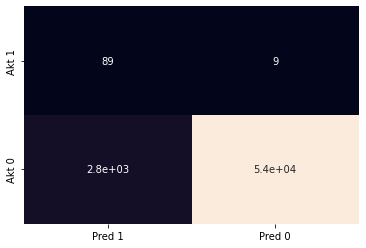

In [53]:
sns.heatmap(df_OS, annot=True, cbar=False)
plt.show()

In [54]:
df_train.head() ## X_train + y_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
265518,161919.0,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,...,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,7.32,0
180305,124477.0,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,...,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,2.99,0
42664,41191.0,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,...,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,175.10,0
198723,132624.0,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,...,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,6.10,0
82325,59359.0,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,...,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,86.10,0


In [55]:
df_train['Class'].value_counts()

0    227451
1       394
Name: Class, dtype: int64

In [56]:
non_fraud = df_train[df_train['Class'] == 0] ## Kelas Majority
fraud = df_train[df_train['Class'] == 1] ## Kelas Minority

In [57]:
non_fraud_undersample = resample(non_fraud, ## Kelas Majority
                            replace=False,
                            n_samples = len(fraud), ## Kelas Minority
                            random_state = 42)

In [58]:
df_undersample = pd.concat([non_fraud_undersample, fraud])

In [59]:
df_undersample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
20945,31369.0,1.114107,0.188459,0.149144,1.153868,0.224011,0.396246,0.020168,0.217603,-0.141379,...,0.065655,0.367010,-0.090954,-0.271464,0.646597,-0.217493,0.035881,-0.004553,1.00,0
159516,112588.0,1.910941,0.686774,-0.595770,3.817385,0.288991,-0.660187,0.365387,-0.261102,-1.226056,...,0.266636,0.805442,0.114189,0.401013,0.069967,0.108304,-0.039724,-0.047338,5.14,0
229456,145930.0,0.013514,0.452287,-0.738086,-0.950309,1.405159,-0.423082,1.115085,-0.073982,-0.349808,...,0.152423,0.411430,-0.017938,0.227643,-0.857711,0.444818,0.136231,0.229043,22.95,0
127881,78505.0,-1.273388,0.270815,1.256719,1.064659,-1.401545,0.234430,1.194255,0.412955,-0.528987,...,0.407454,0.673393,0.759378,0.580046,-0.310258,-0.463227,-0.023899,0.134970,325.00,0
158110,110944.0,1.978615,0.114560,-1.322450,0.577586,0.348417,-0.376863,-0.211046,-0.123861,1.623757,...,-0.138925,-0.031185,0.191191,0.598530,-0.182579,0.389251,-0.075180,-0.040764,14.05,0


In [60]:
df_undersample['Class'].value_counts()

0    394
1    394
Name: Class, dtype: int64

In [61]:
X_train_US = df_undersample.drop(columns='Class')
y_train_US = df_undersample['Class']

In [62]:
LR_US = LogisticRegression()

In [63]:
LR_US.fit(X_train_US, y_train_US)

LogisticRegression()

In [64]:
y_predUS = LR_US.predict(X_test)

In [65]:
print(classification_report(y_test, y_predUS))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.92      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.96      0.98     56962



In [66]:
cm_US = confusion_matrix(y_test, y_predUS, labels=[1,0])

In [67]:
df_US = pd.DataFrame(cm_US, index=['Atk 1', 'Akt 0'], columns = ['Pred 1', 'Pred 0'])
df_US

,Pred 1,Pred 0
Atk 1,90,8
Akt 0,2313,54551


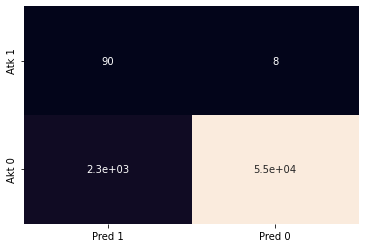

In [68]:
sns.heatmap(df_US, annot=True, cbar=False)
plt.show()

In [69]:
### Metode Iseng

In [70]:
df_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
265518,161919.0,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,...,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,7.32,0
180305,124477.0,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,...,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,2.99,0
42664,41191.0,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,...,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,175.10,0
198723,132624.0,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,...,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,6.10,0
82325,59359.0,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,...,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,86.10,0


In [71]:
df_train['Class'].value_counts()

0    227451
1       394
Name: Class, dtype: int64

In [72]:
non_fraud = df_train[df_train['Class'] == 0] ## Kelas Majority
fraud = df_train[df_train['Class'] == 1] ## Kelas Minority

In [73]:
fraud_OS = resample(fraud, ## Kelas Nimority
                            replace=True,
                            n_samples = 120000, ## Kelas Majority
                            random_state = 42)

In [74]:
non_fraud_US = resample(non_fraud, ## Kelas Majority
                            replace=False,
                            n_samples = 120000, ## Kelas Minority
                            random_state = 42)

In [76]:
df_US_OS = pd.concat([non_fraud_US, fraud_OS])

In [77]:
X_train_UOS = df_US_OS.drop(columns='Class')
y_train_UOS = df_US_OS['Class']

In [78]:
LR_UOS = LogisticRegression()

In [79]:
LR_UOS.fit(X_train_UOS, y_train_UOS)

LogisticRegression()

In [80]:
y_predUOS = LR_UOS.predict(X_test)

In [81]:
print(classification_report(y_test, y_predUOS))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.92      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.96      0.98     56962



In [82]:
cm_UOS = confusion_matrix(y_test, y_predUOS, labels=[1,0])

In [83]:
df_UOS = pd.DataFrame(cm_UOS, index=['Atk 1', 'Akt 0'], columns = ['Pred 1', 'Pred 0'])
df_UOS

,Pred 1,Pred 0
Atk 1,90,8
Akt 0,2257,54607


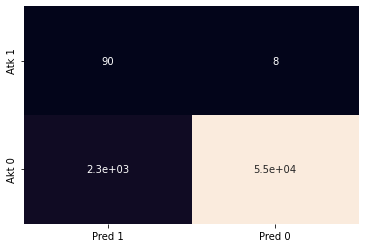

In [84]:
sns.heatmap(df_UOS, annot=True, cbar=False)
plt.show()

In [85]:
import imblearn

## install package imblearn
conda install -c conda-forge imbalanced-learn==0.6

In [86]:
from imblearn.over_sampling import SMOTE

In [87]:
sm = SMOTE(random_state=42)

In [88]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
265518,161919.0,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,...,-0.134435,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,7.32
180305,124477.0,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,...,-0.227279,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,2.99
42664,41191.0,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,...,1.280856,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,175.10
198723,132624.0,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,...,-0.490642,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,6.10
82325,59359.0,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,...,-0.275297,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,86.10


In [89]:
y_train.head()

265518    0
180305    0
42664     0
198723    0
82325     0
Name: Class, dtype: int64

In [90]:
df_train['Class'].value_counts()

0    227451
1       394
Name: Class, dtype: int64

In [92]:
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

In [93]:
## Optional untuk Cek Proporsi
df_SMOTE = pd.concat([X_train_sm, y_train_sm], axis=1)

In [94]:
df_SMOTE['Class'].value_counts()

0    227451
1    227451
Name: Class, dtype: int64

In [95]:
LR_SMOTE = LogisticRegression()

In [96]:
LR_SMOTE.fit(X_train_sm, y_train_sm)

LogisticRegression()

In [97]:
y_predSMOTE = LR_SMOTE.predict(X_test)

In [99]:
print(classification_report(y_test, y_predSMOTE))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.91      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.56     56962
weighted avg       1.00      0.98      0.99     56962



In [100]:
cm_SMOTE = confusion_matrix(y_test, y_predSMOTE, labels=[1,0])

In [101]:
df_SMOTE = pd.DataFrame(cm_SMOTE, index=['Akt 1', 'Akt 0'], columns=['Pred 1', 'Pred 0'])

In [102]:
df_SMOTE

,Pred 1,Pred 0
Akt 1,89,9
Akt 0,1273,55591


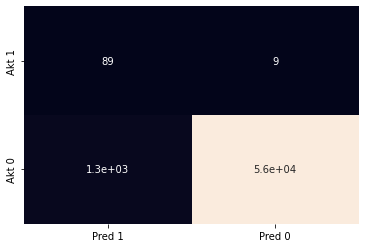

In [104]:
sns.heatmap(df_SMOTE, annot=True, cbar=False)
plt.show()

In [105]:
LR_CW = LogisticRegression(class_weight={0 : .03, 1 : .97})

In [106]:
LR_CW.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.03, 1: 0.97})

In [107]:
y_predCW = LR_CW.predict(X_test)

In [110]:
print(classification_report(y_test, y_predCW))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.19      0.89      0.31        98

    accuracy                           0.99     56962
   macro avg       0.59      0.94      0.65     56962
weighted avg       1.00      0.99      1.00     56962



In [111]:
cm_CW = confusion_matrix(y_test, y_predCW, labels=[1,0])

In [112]:
df_CW = pd.DataFrame(cm_CW, index=['Atk 1', 'Akt 0'], columns = ['Pred 1', 'Pred 0'])
df_CW

,Pred 1,Pred 0
Atk 1,87,11
Akt 0,371,56493


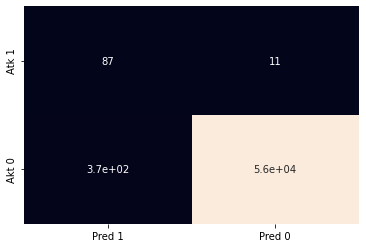

In [113]:
sns.heatmap(df_CW, annot=True, cbar=False)
plt.show()

In [114]:
LR_CW2 = LogisticRegression(class_weight={0 : .10, 1 : .90})

In [115]:
LR_CW2.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.1, 1: 0.9})

In [116]:
y_predCW2 = LR_CW2.predict(X_test)

In [118]:
print(classification_report(y_test, y_predCW2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.50      0.83      0.62        98

    accuracy                           1.00     56962
   macro avg       0.75      0.91      0.81     56962
weighted avg       1.00      1.00      1.00     56962



In [119]:
cm_CW2 = confusion_matrix(y_test, y_predCW2, labels=[1,0])
df_CW2 = pd.DataFrame(cm_CW2, index=['Atk 1', 'Akt 0'], columns = ['Pred 1', 'Pred 0'])
df_CW2

,Pred 1,Pred 0
Atk 1,81,17
Akt 0,82,56782


In [120]:
### Improvement Menggunakan Model

In [121]:
from sklearn.svm import SVC

In [123]:
SVM_1 = SVC()

In [125]:
SVM_1.fit(X_train, y_train)

SVC()

In [126]:
y_predSVM = SVM_1.predict(X_test)

In [127]:
print(classification_report(y_test, y_predSVM))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



In [128]:
cm_SVM = confusion_matrix(y_test, y_predSVM, labels=[1,0])
df_SVM = pd.DataFrame(cm_SVM, index=['Atk 1', 'Akt 0'], columns = ['Pred 1', 'Pred 0'])
df_SVM

,Pred 1,Pred 0
Atk 1,0,98
Akt 0,0,56864


In [129]:
### Optimize Model

In [130]:
from sklearn.preprocessing import StandardScaler

In [131]:
std = StandardScaler()
std.fit(X_train)

StandardScaler()

In [132]:
X_train_sc = std.transform(X_train)

In [133]:
X_test_sc = std.transform(X_test)

In [134]:
SVM_2 = SVC(max_iter = 400)

In [136]:
SVM_2.fit(X_train_sc, y_train)

SVC(max_iter=400)

In [137]:
y_SVM = SVM_2.predict(X_test_sc)

In [138]:
print(classification_report(y_test, y_SVM))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.76      0.85        98

    accuracy                           1.00     56962
   macro avg       0.98      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [140]:
cm_SVM_2 = confusion_matrix(y_test, y_SVM, labels=[1,0])
df_SVM_2 = pd.DataFrame(cm_SVM_2, index=['Atk 1', 'Akt 0'], columns = ['Pred 1', 'Pred 0'])
df_SVM_2

,Pred 1,Pred 0
Atk 1,74,24
Akt 0,3,56861


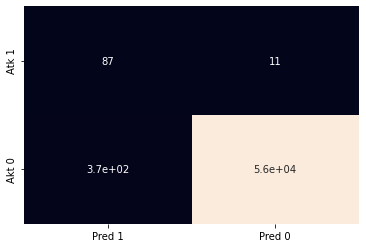

In [141]:
sns.heatmap(df_CW, annot=True, cbar=False)
plt.show()

In [142]:
### Feature Engineering & TuningWeight
### Scaling + Class

In [143]:
rbs = RobustScaler()

In [144]:
rbs.fit(X_train)

RobustScaler()

In [145]:
X_train_scaled = rbs.transform(X_train)

In [146]:
X_test_scaled = rbs.transform(X_test)

In [147]:
SVM_3 = SVC(class_weight={0 : 0.40, 1 : .60})

In [148]:
SVM_3.fit(X_train_scaled, y_train)

SVC(class_weight={0: 0.4, 1: 0.6})

In [149]:
y_SVM2 = SVM_3.predict(X_test_scaled)

In [150]:
print(classification_report(y_test, y_SVM2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.89      0.68      0.77        98

    accuracy                           1.00     56962
   macro avg       0.95      0.84      0.89     56962
weighted avg       1.00      1.00      1.00     56962



In [151]:
### SVM 4

In [152]:
SVM_4 = SVC (class_weight={0 : .10, 1 : .90})

In [154]:
SVM_4.fit(X_train_sc, y_train)

SVC(class_weight={0: 0.1, 1: 0.9})

In [155]:
y_SVM3 = SVM_4.predict(X_test_sc)

In [157]:
print(classification_report(y_test, y_SVM3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.74      0.78        98

    accuracy                           1.00     56962
   macro avg       0.91      0.87      0.89     56962
weighted avg       1.00      1.00      1.00     56962



In [158]:
cm_SVM_3 = confusion_matrix(y_test, y_SVM3, labels=[1,0])
df_SVM_3 = pd.DataFrame(cm_SVM_3, index=['Atk 1', 'Akt 0'], columns = ['Pred 1', 'Pred 0'])
df_SVM_3

,Pred 1,Pred 0
Atk 1,73,25
Akt 0,17,56847


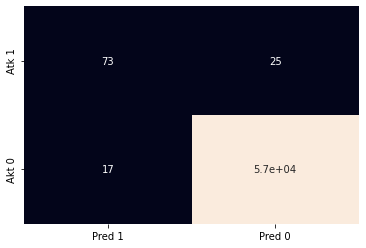

In [160]:
sns.heatmap(df_SVM_3, annot=True, cbar=False)
plt.show()